In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


# Define the path to your dataset
dataset_path = 'dataset1'

# Get the list of class names (folder names)
class_names = os.listdir(dataset_path)


In [2]:
# Supported image file extensions
supported_extensions = ('.jpg', '.jpeg', '.png')

# Initialize empty lists for images and labels
images = []
labels = []


In [3]:
# Iterate through each class folder
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):
        # Loop through all files in the class folder
        for img_file in os.listdir(class_folder):
            # Skip hidden files and folders (like .ipynb_checkpoints)
            if img_file.startswith('.') or not img_file.endswith(supported_extensions):
                continue
            
            img_path = os.path.join(class_folder, img_file)

            # Read the image using OpenCV
            img = cv2.imread(img_path)
            
            # Check if the image is loaded properly
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue  # Skip this image
            
            # Convert image from BGR to RGB (since OpenCV uses BGR by default)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize the image to a fixed size (e.g., 64x64)
            img = cv2.resize(img, (64, 64))
            
            # Append the image and its label (class) to the lists
            images.append(img)
            labels.append(class_idx)  # Class label as index
            

In [4]:
# Convert the images and labels lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the image data (scale pixel values between 0 and 1)
images = images / 255.0  # Normalize to [0, 1]

print(f"Number of images: {len(images)}")
print(f"Shape of image data: {images.shape}")

Number of images: 249
Shape of image data: (249, 64, 64, 3)


In [5]:
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (199, 64, 64, 3)
Test data shape: (50, 64, 64, 3)


In [6]:
# Build the CNN model
model = models.Sequential()

# Add convolutional layers, pooling layers, and fully connected layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



In [7]:
# Flatten the 3D output to 1D vector
model.add(layers.Flatten())

# Add fully connected (dense) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))  # Output layer for classification

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [9]:
# Model summary to check the architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
7/7 [==============================] - 3s 184ms/step - loss: 1.7027 - accuracy: 0.1809 - val_loss: 1.5703 - val_accuracy: 0.4200
Epoch 2/10
7/7 [==============================] - 1s 101ms/step - loss: 1.5397 - accuracy: 0.3116 - val_loss: 1.4881 - val_accuracy: 0.4400
Epoch 3/10
7/7 [==============================] - 1s 99ms/step - loss: 1.4271 - accuracy: 0.4020 - val_loss: 1.4224 - val_accuracy: 0.3000
Epoch 4/10
7/7 [==============================] - 1s 107ms/step - loss: 1.3514 - accuracy: 0.3819 - val_loss: 1.4568 - val_accuracy: 0.3400
Epoch 5/10
7/7 [==============================] - 1s 102ms/step - loss: 1.2223 - accuracy: 0.4523 - val_loss: 1.3323 - val_accuracy: 0.3400
Epoch 6/10
7/7 [==============================] - 1s 115ms/step - loss: 1.1997 - accuracy: 0.5126 - val_loss: 1.3550 - val_accuracy: 0.4000
Epoch 7/10
7/7 [==============================] - 1s 103ms/step - loss: 1.0847 - accuracy: 0.5578 - val_loss: 1.3436 - val_accuracy: 0.4200
Epoch 8/10
7/7 [=====

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


2/2 - 0s - loss: 1.4759 - accuracy: 0.4000 - 105ms/epoch - 53ms/step
Test accuracy: 0.4000000059604645


In [12]:
import os
print(os.getcwd())  # Prints the current working directory


C:\Users\Saima Negi\Downloads\PROJECT\jn


In [13]:
# Load a new image for prediction (make sure it's in the same format as the training data)
img_path = 'guessapple.jpeg'  
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (64, 64))  # Resize to match the model input size
img = img / 255.0  # Normalize the image
img = np.expand_dims(img, axis=0)  # Add batch dimension (since model expects a batch of images)

# Make a prediction
predicted_class = model.predict(img)
predicted_class_idx = np.argmax(predicted_class, axis=1)
predicted_class_name = class_names[predicted_class_idx[0]]

print(f"Predicted seed class: {predicted_class_name}")


1/1 [==============================] - 0s 312ms/step
Predicted seed class: apple


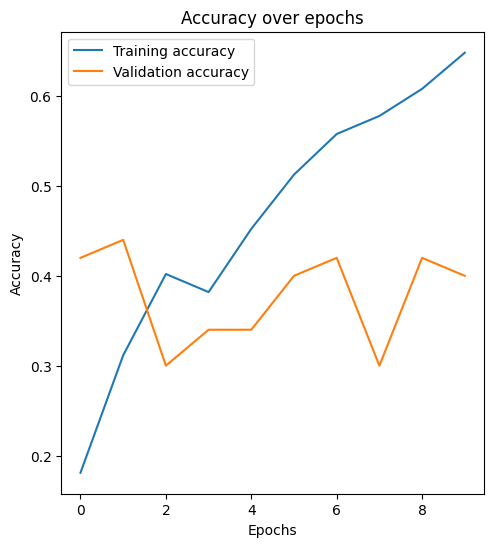

In [17]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
